# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

Download the `employees` dataset from [here](https://drive.google.com/file/d/1qiyQHmmntBsGHjlLSoSh9-t_R4UXOg_H/view?usp=sharing) and place it in the data folder

Load and save your dataset in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv('../data/Employee.csv')
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
# your code here
emp1 = employees.groupby(['Department'])['Salary'].mean()
emp1

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [4]:
# Method 2
# your code here
emp1 = employees.pivot_table(index = ['Department'],values = ['Salary'],aggfunc = np.mean)
emp1

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
# your code here
emp2 = employees.pivot_table(index=['Department', 'Title'],
                     values=['Salary'], aggfunc='mean').reset_index()
emp2

,Department,Title,Salary
0,HR,VP,70.0
1,HR,analyst,32.5
2,IT,VP,70.0
3,IT,analyst,32.5
4,IT,associate,60.0
5,Sales,associate,55.0


#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
# your code here
#Filled the missing values with zeroes.(eg: when there's no Analyst with 7 or 8 years of exp)
emp3 = employees.pivot_table(index = ['Title'],columns = 'Years',values = ['Salary'],fill_value = 0)
emp3

Salary                    
Years          1   2   3   4   7   8
Title                               
VP             0   0   0   0   0  70
analyst       35  30   0  35   0   0
associate      0  55  55   0  60   0

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
# your code here
emp4 = pd.pivot_table(employees,index =['Department','Title'],values=['Salary','Name'],aggfunc={'Salary':[np.mean],'Name':len})
emp4

Name Salary
                      len   mean
Department Title                
HR         VP           1   70.0
           analyst      2   32.5
IT         VP           1   70.0
           analyst      2   32.5
           associate    1   60.0
Sales      associate    2   55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your code here
emp5 = pd.pivot_table(employees,index =['Department','Title'],values=['Salary'],aggfunc=[np.median,np.min,np.max,np.std])
emp5

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [9]:
"""
Due to the relatively small size of data, standard deviation cannot be calculated in cases 
where there is only one record for a Title in a specific Department.

"""
#paolo:yes stedev of one value is zero

'\nDue to the relatively small size of data, standard deviation cannot be calculated in cases \nwhere there is only one record for a Title in a specific Department.\n\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your code here
emp5.fillna(0,inplace = True)
emp5

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [11]:
# your code here
emp6 = employees.pivot_table(index=['Department'],values=['Name','Salary'],aggfunc={'Salary':'sum','Name':'count'})
emp6.rename(columns={'Name': 'No.of employees','Salary':'Money spent on Salary'}, inplace=True)
emp6

,No.of employees,Money spent on Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [12]:
# your code here
emp7 = employees.pivot_table(index = ['Department','Title'],values = ['Years','Salary'],aggfunc = {'Years':'sum','Salary':'mean'})
emp7.rename(columns={'Years':'Total Exp.in Years'},inplace = True)
emp7

Salary  Total Exp.in Years
Department Title                                
HR         VP           70.0                   8
           analyst      32.5                   6
IT         VP           70.0                   8
           analyst      32.5                   3
           associate    60.0                   7
Sales      associate    55.0                   5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [13]:
# your code here

# Challenge 2

Read the `fitbit` dataset from
[here](https://drive.google.com/file/d/1V3A0sRLmAb6BDFoZBIrjUOMl5Ap9wSts/view?usp=sharing) and place it in the data folder


Save your data in a variable called `fitbit`.

In [14]:
# your code here
fitbit = pd.read_csv('../data/fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [15]:
# your code here
#To get the descriptive statistics of a dataframe
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [16]:
#find datatypes 
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [17]:
# your code here
corr = fitbit['Minutes Very Active'].corr(fitbit['Steps'])
corr

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [18]:
import matplotlib.pyplot as plt;

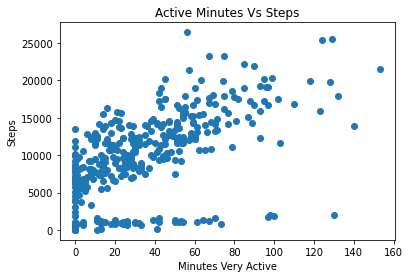

In [19]:

plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('Active Minutes Vs Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [20]:
"""
Correlation between the 2 variables is 0.57 which is moderately positive. And that can be seen in the graph .
But there are certain data points at the zero level as well.
"""

'\nCorrelation between the 2 variables is 0.57 which is moderately positive. And that can be seen in the graph .\nBut there are certain data points at the zero level as well.\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [21]:
# your code here
corr = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
corr

0.07690608062990094

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

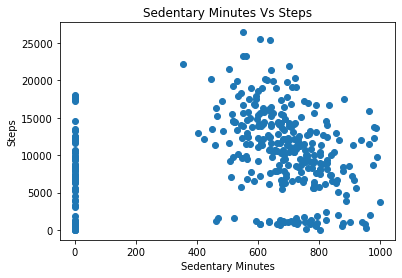

In [22]:
# your code here
x = fitbit['Minutes Sedentary']
y = fitbit['Steps']
plt.scatter(x, y)
plt.title('Sedentary Minutes Vs Steps')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Steps')
plt.show()

In [23]:
"""
The correlation value 0.07 and the plot both proves that there is negligible correlation between these 2 variables.
"""

'\nThe correlation value 0.07 and the plot both proves that there is negligible correlation between these 2 variables.\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [24]:
# your code here
corr = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
corr

0.13098565950836386

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

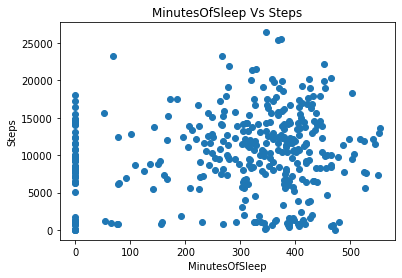

In [25]:
# your code here
x = fitbit['MinutesOfSleep']
y = fitbit['Steps']
plt.scatter(x, y)
plt.title('MinutesOfSleep Vs Steps')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

In [26]:
"""
Again,the value of correlation 0.13 and the graph put together shows that there's almost no correlation between the variables.
"""

"\nAgain,the value of correlation 0.13 and the graph put together shows that there's almost no correlation between the variables.\n"

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [27]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [28]:
# your code here
new_fitbit = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]
#new_fitbit
cor_fit = new_fitbit.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [29]:
# your code here
cor_fitbit = cor_fit["Steps"].sort_values(ascending = False)
cor_fitbit

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

"Steps" vs "Minutes Very Active" has the highest correlation. i.e the more minutes a person active was, indicates that the more steps he might have taken during that workout.

# Challenge 3

Read the `time_grades` dataset from 
[here](https://drive.google.com/file/d/1zKAqZPjLnU96cvfMzqfFz-hH6YxCNVKN/view?usp=sharing) and place it in the data folder


Save your data in a variable called `time_grades`.

In [30]:
# your code here
time_grades = pd.read_csv('../data/Time_grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

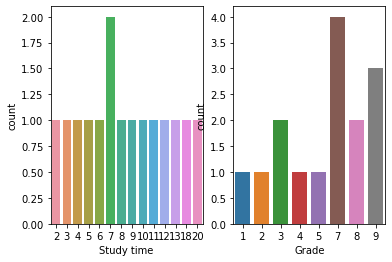

In [31]:
# your code here
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)

sns.countplot(time_grades['Study time'],ax =ax[0])
sns.countplot(time_grades['Grade'],ax =ax[1])
plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [32]:
# your code here
time_grades.corr(method = 'pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [33]:
time_grades.corr(method = 'spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [34]:
"""
Study time and grade have a strong positive correlation. However, a slightly higher value of correlation 
is found in Spearman method.
"""

'\nStudy time and grade have a strong positive correlation. However, a slightly higher value of correlation \nis found in Spearman method.\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

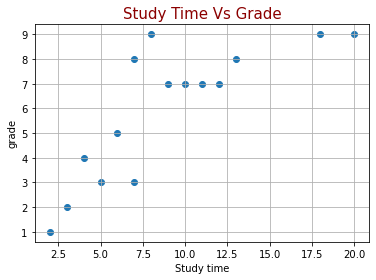

In [35]:
# your code here

x= time_grades['Study time']
y= time_grades['Grade']
plt.scatter(x,y)
# Add labels to the plot and change xticks rotation
plt.xlabel('Study time',fontsize = 10)
plt.xticks(rotation = 360)
plt.ylabel('grade',fontsize = 10)
plt.title("Study Time Vs Grade",c = "darkred",fontsize=15)
plt.grid(True)

# Show the plot
plt.show()

In [36]:
"""
Generally ,the more the hours of study time, the higher the grade is.But there are some outliers.
eg: the student who spent 8 hours to study also got Grade 9 compared to those who spent 20 hours and 18 hours to get Grade 9.
Also, students who spent 5 hrs and 7 hours got Grade 3 ,while the one who spent less hours(4 hrs) secured a higher grade 4.

"""

'\nGenerally ,the more the hours of study time, the higher the grade is.But there are some outliers.\neg: the student who spent 8 hours to study also got Grade 9 compared to those who spent 20 hours and 18 hours to get Grade 9.\nAlso, students who spent 5 hrs and 7 hours got Grade 3 ,while the one who spent less hours(4 hrs) secured a higher grade 4.\n\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [37]:
"""
Pearson :Used when there is normal distribution of variables,when there is a linear relationship between them.  
Spearman : Variables not normally distributed , no linear relation.

Pearson: calculated on actual data values
Spearman : calculated based on rank values for each variable.

"""

'\nPearson :Used when there is normal distribution of variables,when there is a linear relationship between them.  \nSpearman : Variables not normally distributed , no linear relation.\n\nPearson: calculated on actual data values\nSpearman : calculated based on rank values for each variable.\n\n'

In [38]:
#paolo-great lab!